Dataset Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

/var/folders/wk/zff9mbq17p7_1zb7p86yc9600000gn/T/ipykernel_19712/2552996225.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


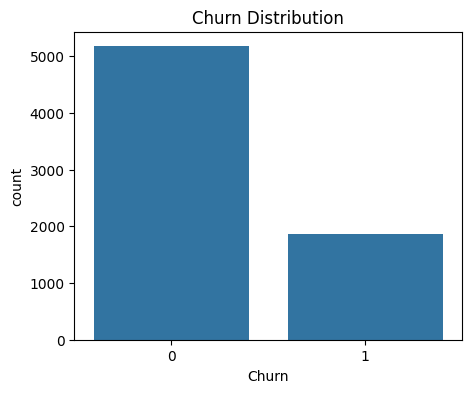

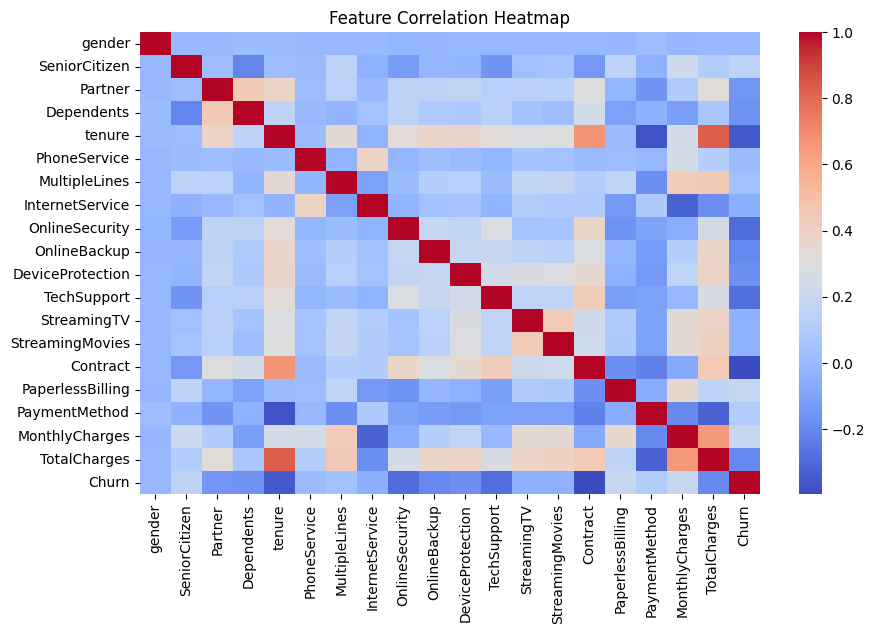


📊 Logistic Regression Evaluation:
Accuracy: 0.799
Recall: 0.548
ROC-AUC: 0.719

Confusion Matrix:
 [[921 114]
 [169 205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



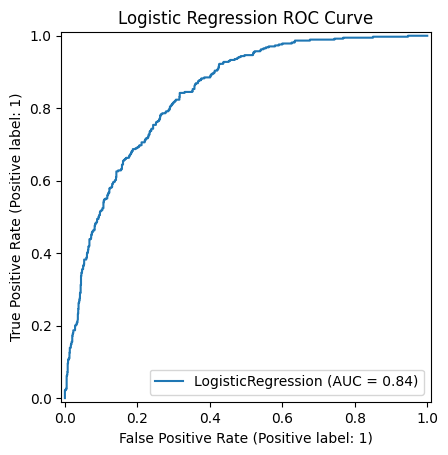


📊 Random Forest Evaluation:
Accuracy: 0.791
Recall: 0.495
ROC-AUC: 0.696

Confusion Matrix:
 [[929 106]
 [189 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



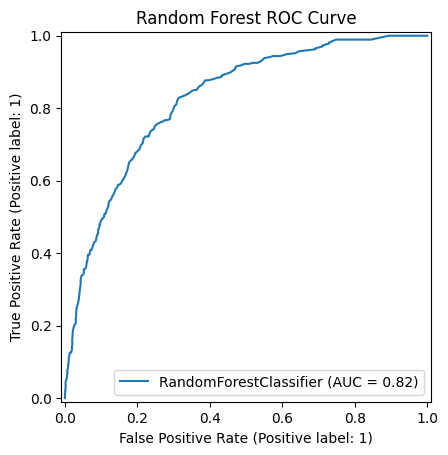

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [09:28:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost Evaluation:
Accuracy: 0.784
Recall: 0.511
ROC-AUC: 0.697

Confusion Matrix:
 [[914 121]
 [183 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



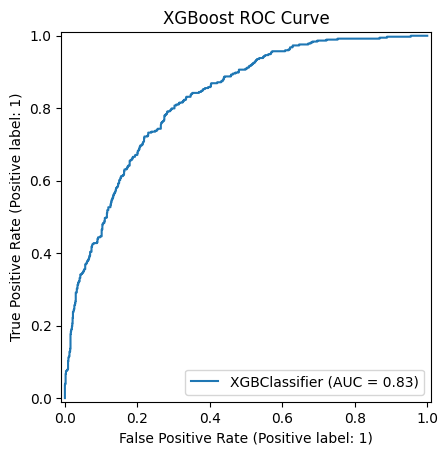

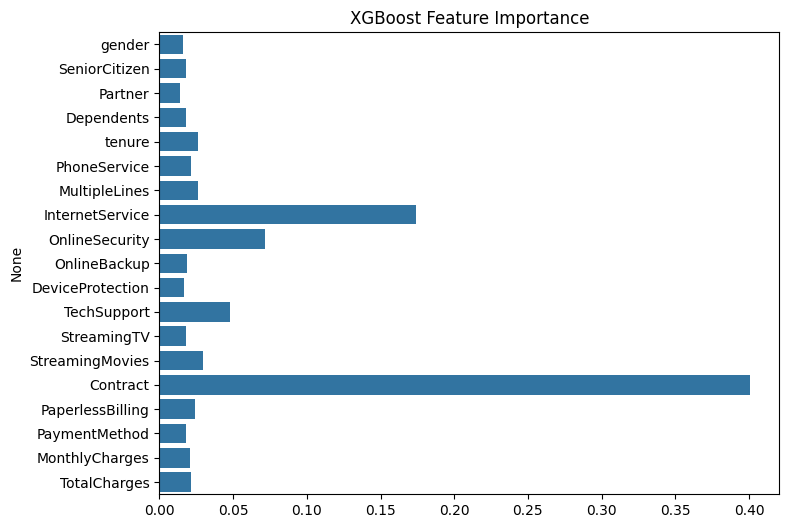

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# -------------------------------
# 2. Data Preprocessing
# -------------------------------
# Drop customerID (unique, not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (may contain spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert target variable (Churn) to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# -------------------------------
# 3. Exploratory Data Analysis (EDA)
# -------------------------------
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# -------------------------------
# 4. Train-Test Split
# -------------------------------
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------------------
# 5. Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# 6. Model Training & Evaluation
# -------------------------------

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    
    print(f"\n📊 {model_name} Evaluation:")
    print("Accuracy:", round(acc, 3))
    print("Recall:", round(rec, 3))
    print("ROC-AUC:", round(roc, 3))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{model_name} ROC Curve")
    plt.show()

# 1️⃣ Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test, "Logistic Regression")

# 2️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

# 3️⃣ XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost")

# -------------------------------
# 7. Feature Importance (XGBoost)
# -------------------------------
plt.figure(figsize=(8,6))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importance")
plt.show()
